In [1]:
import jpype

jpype.startJVM(jpype.getDefaultJVMPath())

In [2]:
import pickle as pkl
import os
import matplotlib.pyplot as plt
import numpy as np

0.1 gain = 94.93333333333347 V
211.33333333333346


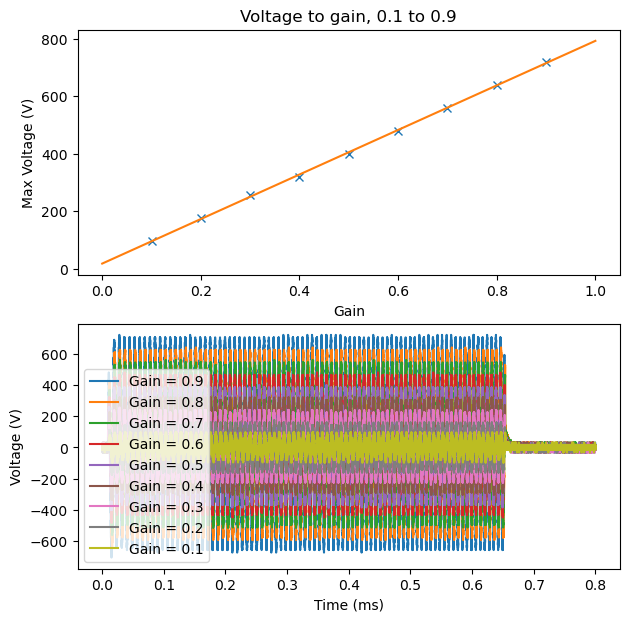

In [9]:
DIR = '../results/2022-11-17T14:58:53'
# - Gain scan from 0.1 to 1
#     - `2022-11-17T14:58:53`
#     - 500 Acqs at 1ms
#     - Chirp .3 to .35
#     - OASIS showing one single chirp, 80us/div, 625V/div
files = os.listdir(DIR)

initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if 'scope_0' in f]
scope1_files = [f for f in files if 'scope)1' in f]
scope0_files.sort(key=lambda f: f.split('T')[1])
scope1_files.sort(key=lambda f: f.split('T')[1])

scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))
fig, ax = plt.subplots(2, 1, figsize=(7, 7))

maxes = []
for i, s in reversed(list(zip(initial['param_space'], scope0))):
    time = np.array(s['data']['time']) * 1e-6
    voltage = np.array(s['data']['value']) / 10000 * 625
    ax[1].plot(time, voltage, label=f"Gain = {round(i, 2)}")
    ax[1].set_xlabel("Time (ms)")
    ax[1].set_ylabel("Voltage (V)")
    maxes.append(max(voltage))

ax[0].plot(initial['param_space'], list(reversed(maxes)), 'x')
ax[0].set_xlabel("Gain")
ax[0].set_ylabel("Max Voltage (V)")
# fit to a line
m, b = np.polyfit(initial['param_space'], list(reversed(maxes)), 1)
ax[0].plot(np.linspace(0, 1, 100), m * np.linspace(0, 1, 100) + b, label=f"y = {round(m, 2)}x + {round(b, 2)}")
ax[1].legend()
print(f"0.1 gain = {(m * 0.1 + b)} V")
ax[0].set_title("Voltage to gain, 0.1 to 0.9")

print(m*0.25 + b)

/opt/homebrew/Caskroom/miniconda/base/envs/cern/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Voltage at 0.1 gain, one chirp')

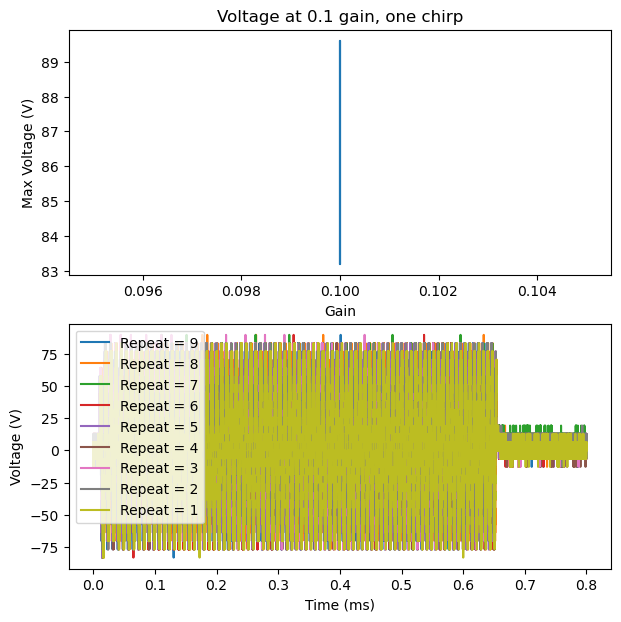

In [4]:
DIR='../results/2022-11-17T12:12:54.043774'
# - Interval scan from 1ms to 10ms in steps of 1ms
#     - `2022-11-17T12:12:54.043774`
#     - 0.1 Gain
#     - .3-.35 chirp
#     - 500 acq
#     - 256 turns
#     - Scope looking at one chirp, 250V/div, 80us/div
#     - Scope at 1260
files = os.listdir(DIR)
initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if 'scope_0' in f]
scope1_files = [f for f in files if 'scope)1' in f]
scope0_files.sort(key=lambda f: f.split('T')[1])
scope1_files.sort(key=lambda f: f.split('T')[1])

scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))
fig, ax = plt.subplots(2, 1, figsize=(7, 7))

maxes = []
for i, s in reversed(list(zip(initial['param_space'], scope0))):
    time = np.array(s['data']['time']) * 1e-6
    voltage = np.array(s['data']['value']) / 10000 * 250
    ax[1].plot(time, voltage, label=f"Repeat = {round(i, 2)}")
    ax[1].set_xlabel("Time (ms)")
    ax[1].set_ylabel("Voltage (V)")
    maxes.append(max(voltage))

ax[0].plot([0.1]*len(maxes), list(reversed(maxes)))
ax[0].set_xlabel("Gain")
ax[0].set_ylabel("Max Voltage (V)")
# fit to a line
m, b = np.polyfit([0.1]*len(maxes), list(reversed(maxes)), 1)
#ax[0].plot(np.linspace(0, 1, 100), m * np.linspace(0, 1, 100) + b, label=f"y = {round(m, 2)}x + {round(b, 2)}")
ax[1].legend()
ax[0].set_title("Voltage at 0.1 gain, one chirp")

/opt/homebrew/Caskroom/miniconda/base/envs/cern/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Voltage at 0.1 gain, whole excitation')

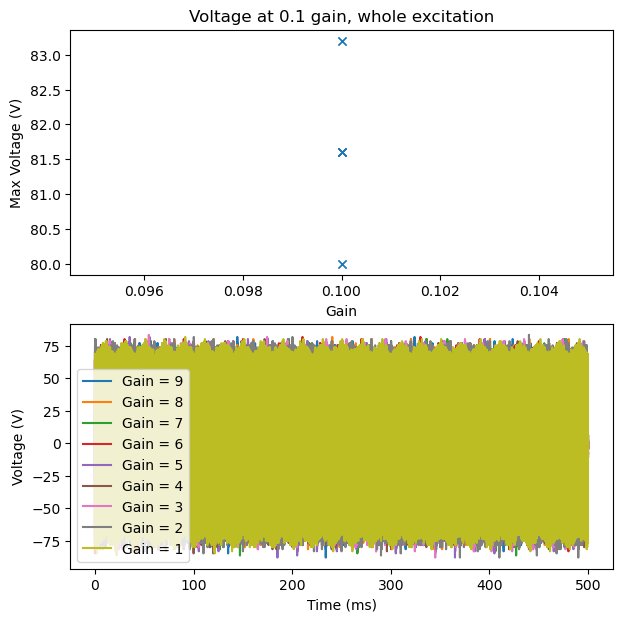

In [5]:
DIR='../results/2022-11-17T12:27:29.119159'
# - Repeat of above but with scope looking at the whole thing
#     - `2022-11-17T12:27:29.119159`
#     - 0.1 Gain
#     - etc
#     - Scope looking at whole chirp, 62.5V/div, 50ms/div
#     - Scope at 1260
files = os.listdir(DIR)
initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if 'scope_0' in f]
scope1_files = [f for f in files if 'scope)1' in f]
scope0_files.sort(key=lambda f: f.split('T')[1])
scope1_files.sort(key=lambda f: f.split('T')[1])

scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))
fig, ax = plt.subplots(2, 1, figsize=(7, 7))

maxes = []
for i, s in reversed(list(zip(initial['param_space'], scope0))):
    time = np.array(s['data']['time']) * 1e-6
    voltage = np.array(s['data']['value']) / 10000 * 62.5
    ax[1].plot(time, voltage, label=f"Gain = {round(i, 2)}")
    ax[1].set_xlabel("Time (ms)")
    ax[1].set_ylabel("Voltage (V)")
    maxes.append(max(voltage))

ax[0].plot([0.1]*len(maxes), list(reversed(maxes)), 'x')
ax[0].set_xlabel("Gain")
ax[0].set_ylabel("Max Voltage (V)")
# fit to a line
m, b = np.polyfit([0.1]*len(maxes), list(reversed(maxes)), 1)
#ax[0].plot(np.linspace(0, 1, 100), m * np.linspace(0, 1, 100) + b, label=f"y = {round(m, 2)}x + {round(b, 2)}")
ax[1].legend()
ax[0].set_title("Voltage at 0.1 gain, whole excitation")

/opt/homebrew/Caskroom/miniconda/base/envs/cern/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Voltage at 0.1 gain, one chirp')

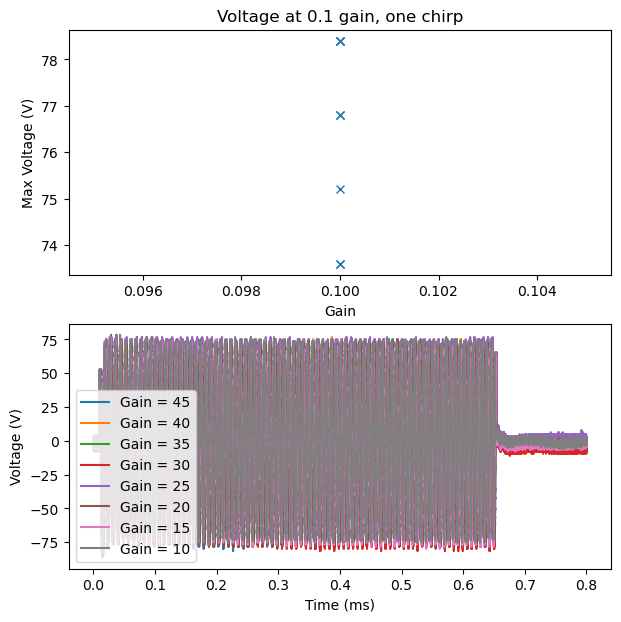

In [6]:
DIR='../results/2022-11-17T12:43:05.943656'
# - Interval scan from 10ms to 50ms in steps of 5ms
#     - `2022-11-17T12:43:05.943656`
#     - Same as above
#     - Scope looking at one chirp, 62.5V/div, 80us/div
#     - Scope at 1260
files = os.listdir(DIR)
initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if 'scope_0' in f]
scope1_files = [f for f in files if 'scope)1' in f]
scope0_files.sort(key=lambda f: f.split('T')[1])
scope1_files.sort(key=lambda f: f.split('T')[1])

scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))
fig, ax = plt.subplots(2, 1, figsize=(7, 7))

maxes = []
for i, s in reversed(list(zip(initial['param_space'], scope0))):
    time = np.array(s['data']['time']) * 1e-6
    voltage = np.array(s['data']['value']) / 10000 * 62.5
    ax[1].plot(time, voltage, label=f"Gain = {round(i, 2)}")
    ax[1].set_xlabel("Time (ms)")
    ax[1].set_ylabel("Voltage (V)")
    maxes.append(max(voltage))

ax[0].plot([0.1]*len(maxes), list(reversed(maxes)), 'x')
ax[0].set_xlabel("Gain")
ax[0].set_ylabel("Max Voltage (V)")
# fit to a line
m, b = np.polyfit([0.1]*len(maxes), list(reversed(maxes)), 1)
#ax[0].plot(np.linspace(0, 1, 100), m * np.linspace(0, 1, 100) + b, label=f"y = {round(m, 2)}x + {round(b, 2)}")
ax[1].legend()
ax[0].set_title("Voltage at 0.1 gain, one chirp")

Text(0.5, 1.0, 'Voltage at 0.1 gain, one chirp')

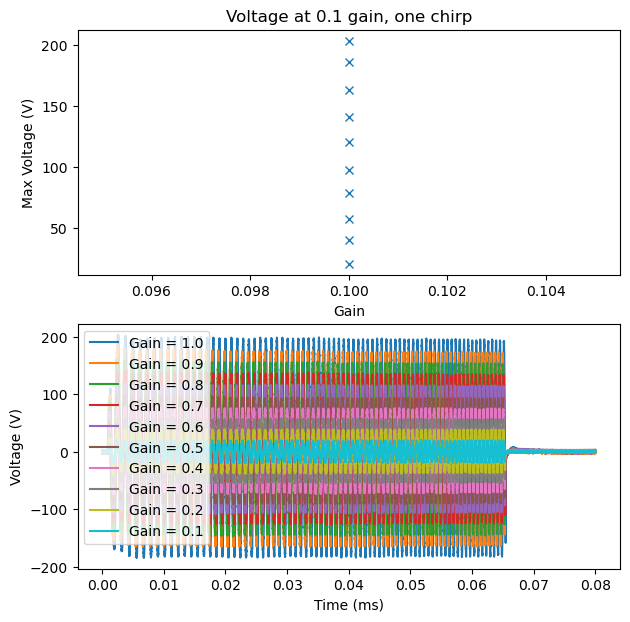

In [7]:
DIR='../results/2022-11-16T17:10:23.770610'

files = os.listdir(DIR)
initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if f.startswith('scope_')]
scope0_files.sort(key=lambda f: f.split('T')[1])


scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))
fig, ax = plt.subplots(2, 1, figsize=(7, 7))

maxes = []
for i, s in reversed(list(zip(initial['param_space'], scope0))):
    
    voltage = np.array(s['data']['value'][1]) / 10000 * 62.5
    time = np.arange(0, len(voltage)) * 1e-6
    ax[1].plot(time, voltage, label=f"Gain = {round(i, 2)}")
    ax[1].set_xlabel("Time (ms)")
    ax[1].set_ylabel("Voltage (V)")
    maxes.append(max(voltage))

ax[0].plot([0.1]*len(maxes), list(reversed(maxes)), 'x')
ax[0].set_xlabel("Gain")
ax[0].set_ylabel("Max Voltage (V)")
# fit to a line
#m, b = np.polyfit([0.1]*len(maxes), list(reversed(maxes)), 1)
#ax[0].plot(np.linspace(0, 1, 100), m * np.linspace(0, 1, 100) + b, label=f"y = {round(m, 2)}x + {round(b, 2)}")
ax[1].legend()
ax[0].set_title("Voltage at 0.1 gain, one chirp")

In [118]:
scope0[0]['data']['value'][2]

IndexError: index 2 is out of bounds for axis 0 with size 2